# Analysis of sales for the online store "Streamchik" as of 2016.

![Alt Text](https://s.zst.com.br/cms-assets/2021/12/melhor-console-de-videogame-2021.webp)

*The modern gaming industry is growing every year. New games and platforms emerge, genres evolve. Sales in the video game segment are influenced by a multitude of factors, the study of which is the goal of this project. During the work, an analysis of data on the sales of an online store will be conducted, a portrait of users in each of the three regions will be compiled, and hypotheses will be tested. At the end of the work, a general conclusion will be drawn about the results of the analysis.*

**Work Plan:**

1) Connect necessary libraries and load data.
2) Familiarize with the data and perform preprocessing.
3) Conduct exploratory data analysis.
4) Analyze data by regions.
5) Formulate and test hypotheses.
6) Make a general conclusion.

**Task Description:**

You work at the online store "Streamchik," which sells computer games worldwide. Historical data on game sales, user and expert ratings, genres, and platforms (such as Xbox or PlayStation) are available from open sources. Your task is to identify patterns that determine the success of a game. This will allow you to focus on potentially popular products and plan advertising campaigns.

You have data up to 2016. Let's imagine it's December 2016, and you're planning a campaign for 2017. You need to practice working with the data. It doesn't matter whether you're forecasting sales for 2017 based on 2016 data or for 2027 based on 2026 data.

The dataset includes the abbreviation ESRB (Entertainment Software Rating Board) - an association that determines the age rating of computer games. ESRB evaluates game content and assigns it an appropriate age category, such as "For Adults," "For Early Childhood," or "For Teens."

## Step 1. Imports and Data Upload

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data0 = pd.read_csv('./datasets/games.csv')
data0.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


During the data review, it was found that:
- The dataset contains 16715 records.
- There are 11 columns in the dataset.

**Column descriptions:**

- Name — game title
- Platform — gaming platform
- Year_of_Release — release year
- Genre — game genre
- NA_sales — sales in North America (millions of copies sold)
- EU_sales — sales in Europe (millions of copies sold)
- JP_sales — sales in Japan (millions of copies sold)
- Other_sales — sales in other countries (millions of copies sold)
- Critic_Score — critic score (maximum 100)
- User_Score — user score (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

*Data for the year 2016 may be incomplete.*

## Step 2. Data Preprocessing

In [4]:
data0.columns = data0.columns.str.lower()
print(f'Пропуски до обработки:\n{data0.isna().sum()}')

Пропуски до обработки:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Let's start by examining the missing values in the 'name' column, as this column contains the name of the game and is considered key.

In [5]:
data0[data0['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
data0[data0['critic_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [7]:
data0[data0['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In the 'user_score' and 'critic_score' columns, there is only one zero value each. Therefore, further replacement of missing values with zeros is unlikely to significantly distort the analysis results.

In [8]:
data0 = data0.drop(data0[data0['name'].isna()].index)
data0['year_of_release'] = data0['year_of_release'].fillna(0)
data0['critic_score'] = data0['critic_score'].fillna(0)
data0['user_score'] = data0['user_score'].fillna(0)
data0['rating'] = data0['rating'].fillna('tbd')
data0.loc[data0['user_score'] == 'tbd', 'user_score'] = 0
print(f'\nThe missing values after processing:\n{data0.isna().sum()}')
data0['year_of_release'] = data0['year_of_release'].astype(int)
data0['critic_score'] = data0['critic_score'].astype(int)
data0['user_score'] = data0['user_score'].astype(float)
data0['total_sales'] = data0['eu_sales'] + data0['jp_sales'] + data0['na_sales'] + data0['other_sales']
data0.head(10)


The missing values after processing:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,tbd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,tbd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,tbd,28.31


In [9]:
key_columns = data0['name'] + data0['platform'] + data0['genre']
key_columns = key_columns.str.lower()
key_columns = key_columns.value_counts().sort_values(ascending=False)
display(key_columns[key_columns > 1])
data0[data0['name'].str.lower() == 'need for speed: most wanted']

need for speed: most wantedpcracing      2
sonic the hedgehogps3platform            2
need for speed: most wantedx360racing    2
madden nfl 13ps3sports                   2
Name: count, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,0,0.0,tbd,2.81
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,0,0.0,tbd,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,0,0.0,tbd,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E,0.27


In [10]:
data0.loc[data0.query('name == "Need for Speed: Most Wanted" & year_of_release == 2005').index, 'name'] = 'Need for \
    Speed: Most Wanted 2005'
data0.loc[data0['name'] == 'Need for Speed: Most Wanted', 'name'] = 'Need for Speed: Most Wanted 2012'


The records for the game "Need for Speed: Most Wanted" do not contain any duplicates. This is because there were two games released under the same name: the classic version in 2005 and its remake in 2012 (released on WiiU in 2013). To differentiate between these two games, they were renamed with the addition of the release year: "Need for Speed: Most Wanted 2005" and "Need for Speed: Most Wanted 2012".

In [11]:
display(data0[data0['name'].str.lower() == 'sonic the hedgehog'])
data0 = data0.drop(4127)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,0,0.0,tbd,4.33
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+,1.17
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46,4.4,E10+,1.03
4127,Sonic the Hedgehog,PS3,0,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+,0.48


A duplicate entry for the game "Sonic the Hedgehog" has been identified and removed.

In [12]:
data0[data0['name'].str.lower() == 'madden nfl 13']
data0 = data0.drop(5059)

A duplicate entry for the game Madden NFL 13 on PS3 was detected and removed.

- It can be noticed that the missing values in the 'name' column coincide with those in the 'genre' column. Also, there is missing rating and scores in these rows. Due to the lack of information and the impossibility to restore it, it was decided to delete these rows.

- It's impossible to restore missing values in the 'year_of_release' column, so they were replaced with 0.

- In the 'critic_score', 'user_score', and 'rating' columns, it's also impossible to determine the missing values. However, to maintain the completeness of the data, they were replaced with 0.

- The abbreviation 'tbd', meaning to be determined, was found in the rating and score columns. In numerical columns, this value was replaced with 0, while in the 'rating' column, it was used to replace missing values due to the impossibility of restoration.

- Duplicate rows with Sonic the Hedgehog and Madden NFL 13 games were removed. Also, the data for Need for Speed: Most Wanted game was rewritten with consideration of its version (2005 and 2012).

The missing values in the 'name' column might have occurred due to an unknown game from 1993. Perhaps both entries were related to the same project, and some glitch deleted the data about it.<br>
The rest of the missing values are too numerous, so their result is most likely a system glitch.

## Step 3. Exploratory Data Analysis

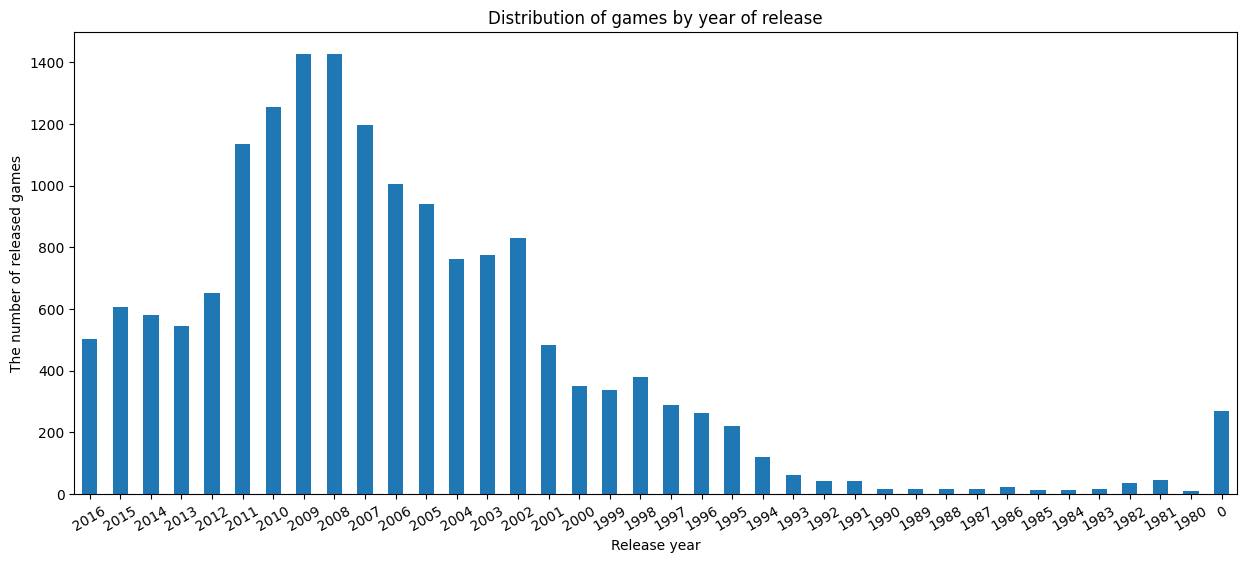

year_of_release
2008    1427
2009    1426
2010    1255
Name: count, dtype: int64

In [13]:
data0['year_of_release'].value_counts().sort_index(ascending=False).plot(kind='bar', figsize=(15,6))
plt.title('Distribution of games by year of release')
plt.xlabel('Release year')
plt.ylabel('The number of released games')
plt.xticks(rotation=30)
plt.show()
data0['year_of_release'].value_counts().sort_values(ascending=False).head(3)

The games are normally distributed by the year of release, with a long negative tail. The peak occurred in 2008 and 2009 when 1426 and 1427 games were released respectively.

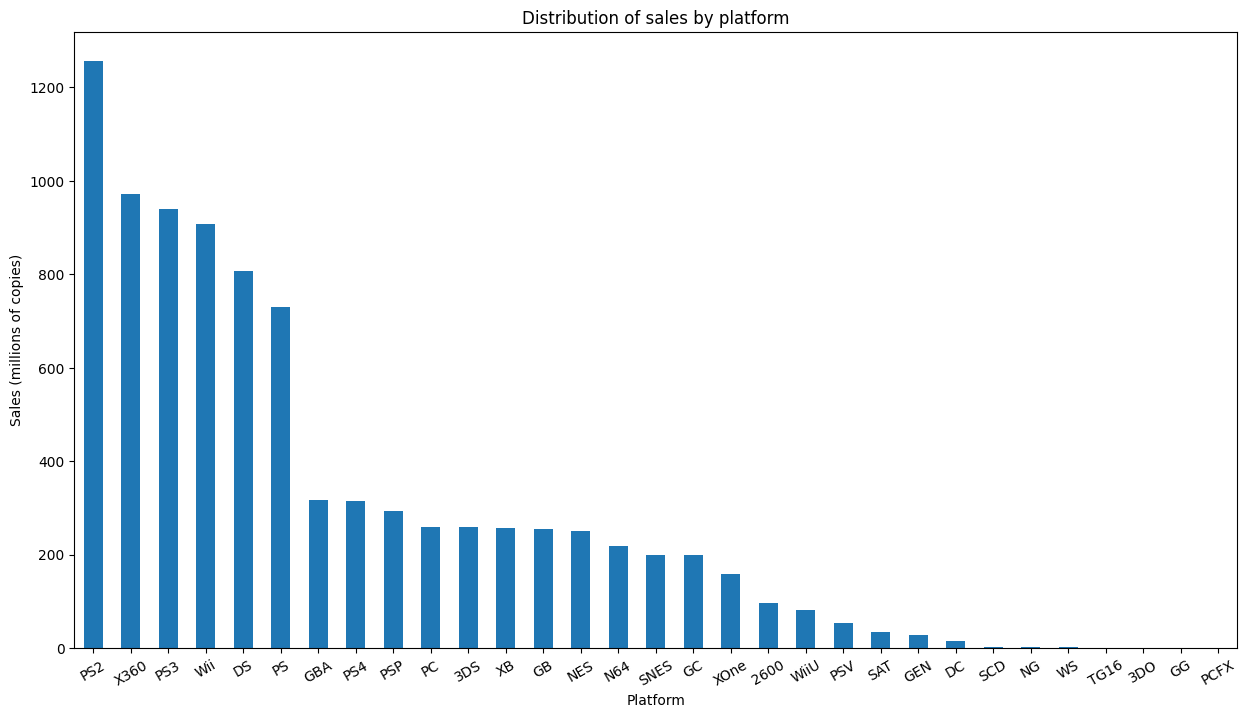

platform
PS2     1255.77
X360     971.42
PS3      939.17
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

In [14]:
platforms_sorted = data0.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms_sorted.plot(kind='bar', figsize=(15 ,8))
plt.title('Distribution of sales by platform')
plt.xlabel('Platform')
plt.ylabel('Sales (millions of copies)')
plt.xticks(rotation=30)
plt.show()
platforms_sorted.head(5)

Among the platforms, the most successful one is PS2 (with 1255 million copies sold), followed by Xbox 360 (971 million copies), PS3 (939 million copies), and Wii (907 million copies).

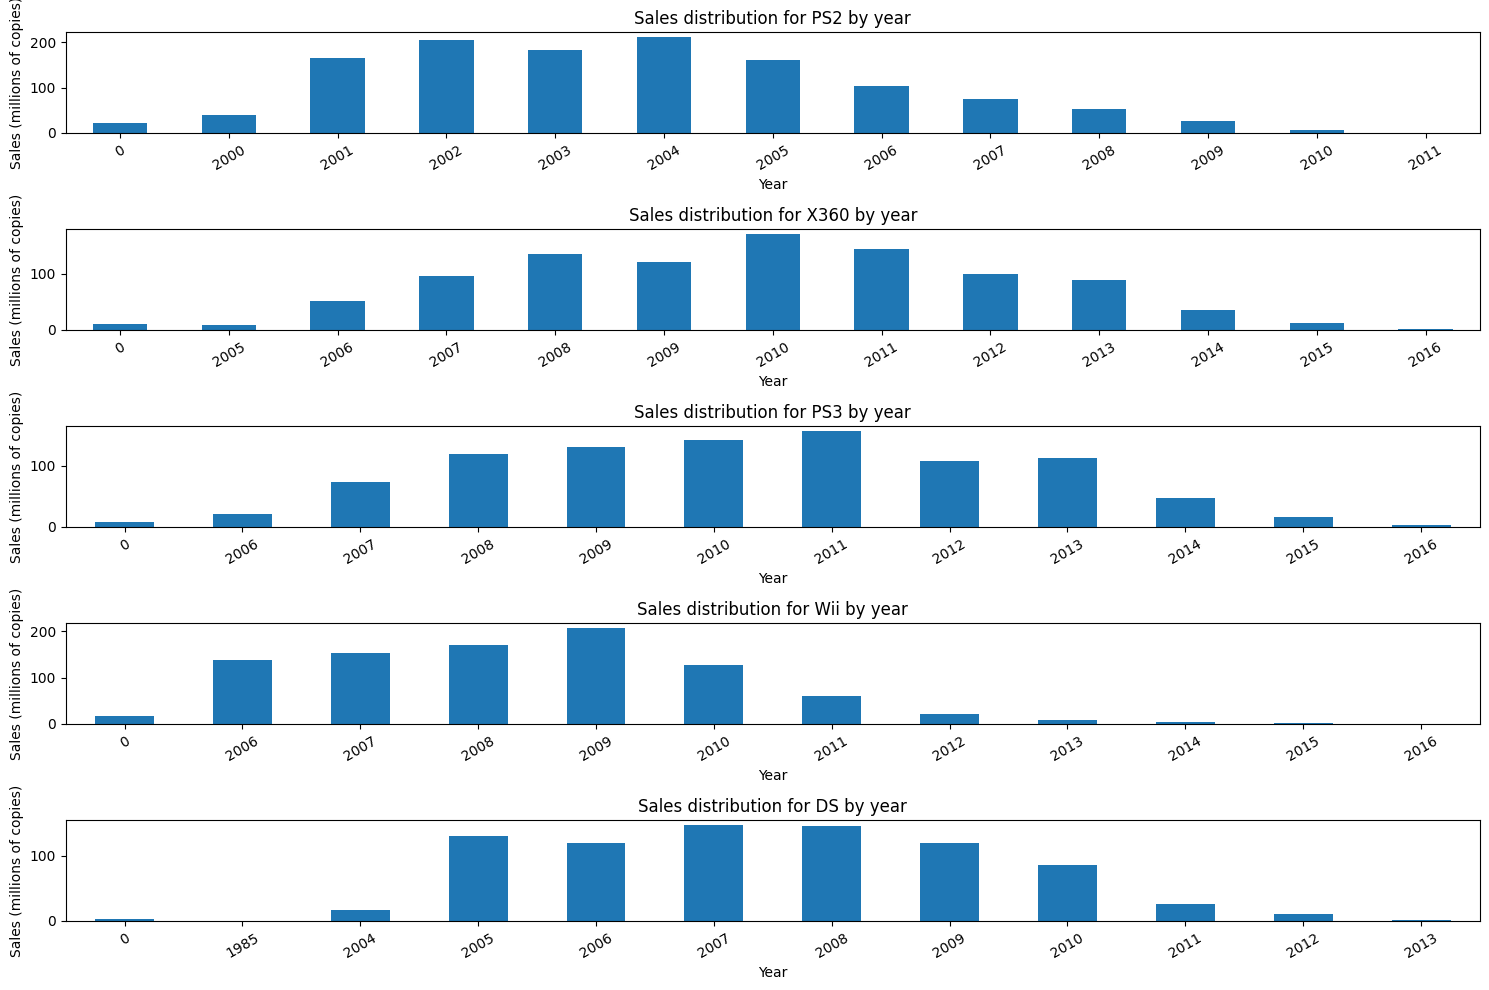

In [15]:
def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True


def largest_prime_divisor(n):
    largest_divisor = 1
    for i in range(2, n + 1):
        if n % i == 0 and is_prime(i):
            largest_divisor = i
    return largest_divisor


def platform_sales(df, plat: [list, str]):
    if isinstance(plat, str):
        df[df['platform'] == plat].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(15, 8))
        plt.title(f'Sales distribution for {plat} by year')
        plt.xlabel('Year')
        plt.ylabel('Sales (millions of copies)')
        plt.xticks(rotation=30)
    else:
        graphs_total = len(plat)
        graphs_count = 1
        rows = largest_prime_divisor(graphs_total)
        columns = int(graphs_total / rows)
        for elem in plat:
            plt.subplot(rows, columns, graphs_count)
            graphs_count += 1
            df[df['platform'] == elem].groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(15, 10))
            plt.title(f'Sales distribution for {elem} by year')
            plt.xlabel('Year')
            plt.ylabel('Sales (millions of copies)')
            plt.xticks(rotation=30)
        plt.tight_layout()
    plt.show()


platform_sales(data0, platforms_sorted.head(5).index.tolist())


It can be observed that the distribution of games released on each platform by year follows a normal distribution. The most popular platforms existed for no more than 10-11 years.

In [16]:
display(data0.query('year_of_release == 1985 & platform == "DS"'))
data0 = data0.drop(15957)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0,0.0,tbd,0.02


A record of a game from 1985 was found and removed from the DS platform, as the platform itself was only introduced in 2004.

In [17]:
platforms_dates = data0[data0['year_of_release'] != 0].groupby('platform').agg({'year_of_release': 'min'})
platforms_dates.columns = ['year_min']
platforms_dates['year_max'] = data0[data0['year_of_release'] != 0].groupby('platform').agg({'year_of_release': 'max'})
platforms_dates['years_in_existence'] = platforms_dates['year_max'] - platforms_dates['year_min']
print(f'Median platform lifetime: {platforms_dates["years_in_existence"].median()}')
platforms_dates

Median platform lifetime: 6.0


,year_min,year_max,years_in_existence
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,2004,2013,9
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


The median lifespan of a platform is 6 years, indicating the relevant timeframe for forecasting sales for the year 2017. To select only the current games, data from the last 3 years will be chosen, representing half of this lifespan. This way, only platforms that are currently relevant in the dynamic gaming market, either at their peak or still growing, and continuing to release games to this day, will be included in the dataset.

In [18]:
data = data0[data0['year_of_release'] > 2013]
data = data.reset_index(drop=True)

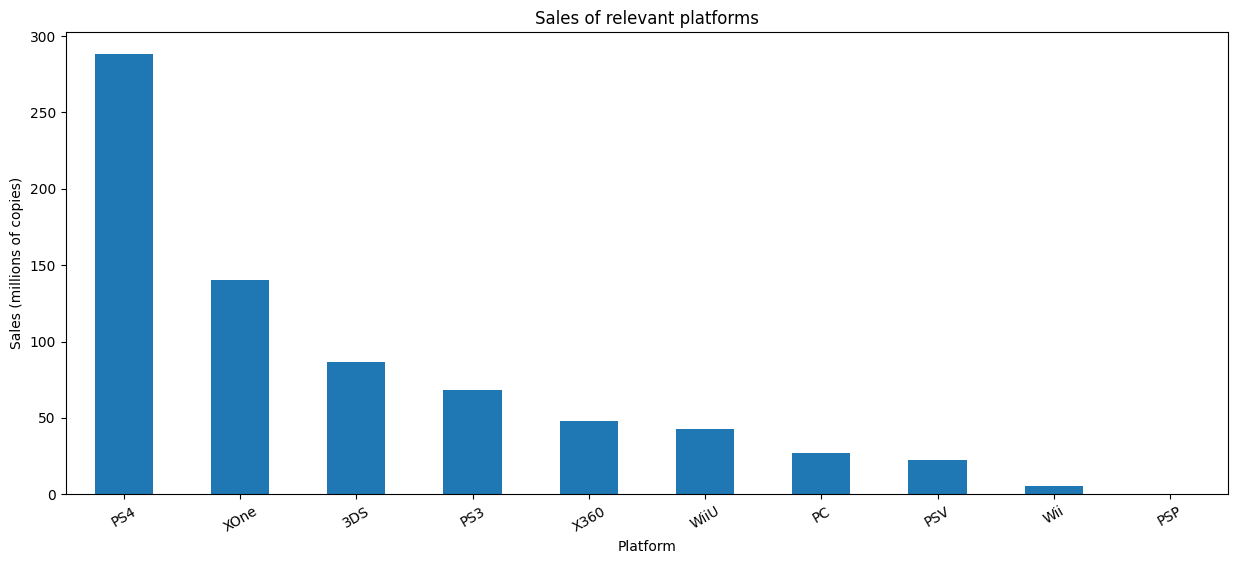

In [19]:
new_platforms_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
new_platforms_sales.plot(kind='bar', figsize=(15, 6))
plt.title('Sales of relevant platforms')
plt.xlabel('Platform')
plt.ylabel('Sales (millions of copies)')
plt.xticks(rotation=30)
plt.show()

Among the current platforms, PS4 has the highest number of sales. It's also worth noting Xbox One and 3DS. Additional scrutiny of sales growth for these platforms is warranted.

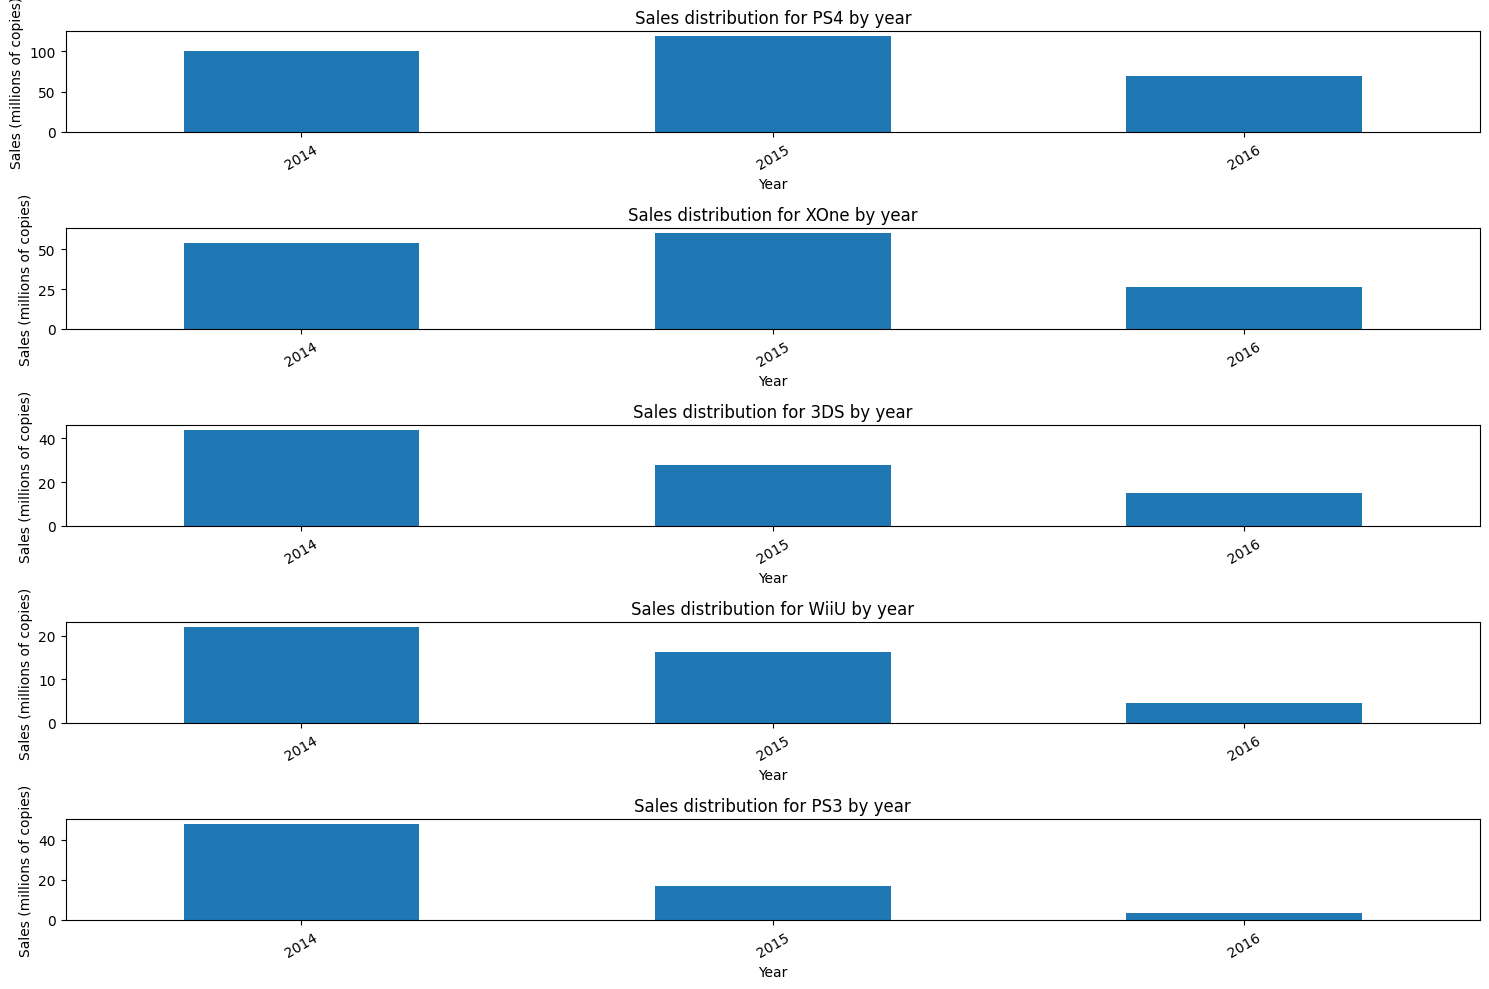

In [20]:
rising_platforms = data[data['year_of_release'] >= 2015].groupby('platform')\
    .agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(5)
platform_sales(data, rising_platforms.index.tolist())


It has been found that among the platforms, PS4 and Xbox One have the greatest potential for growth - their sales have been increasing over the past few years and were at their highest levels as of 2015-2016.

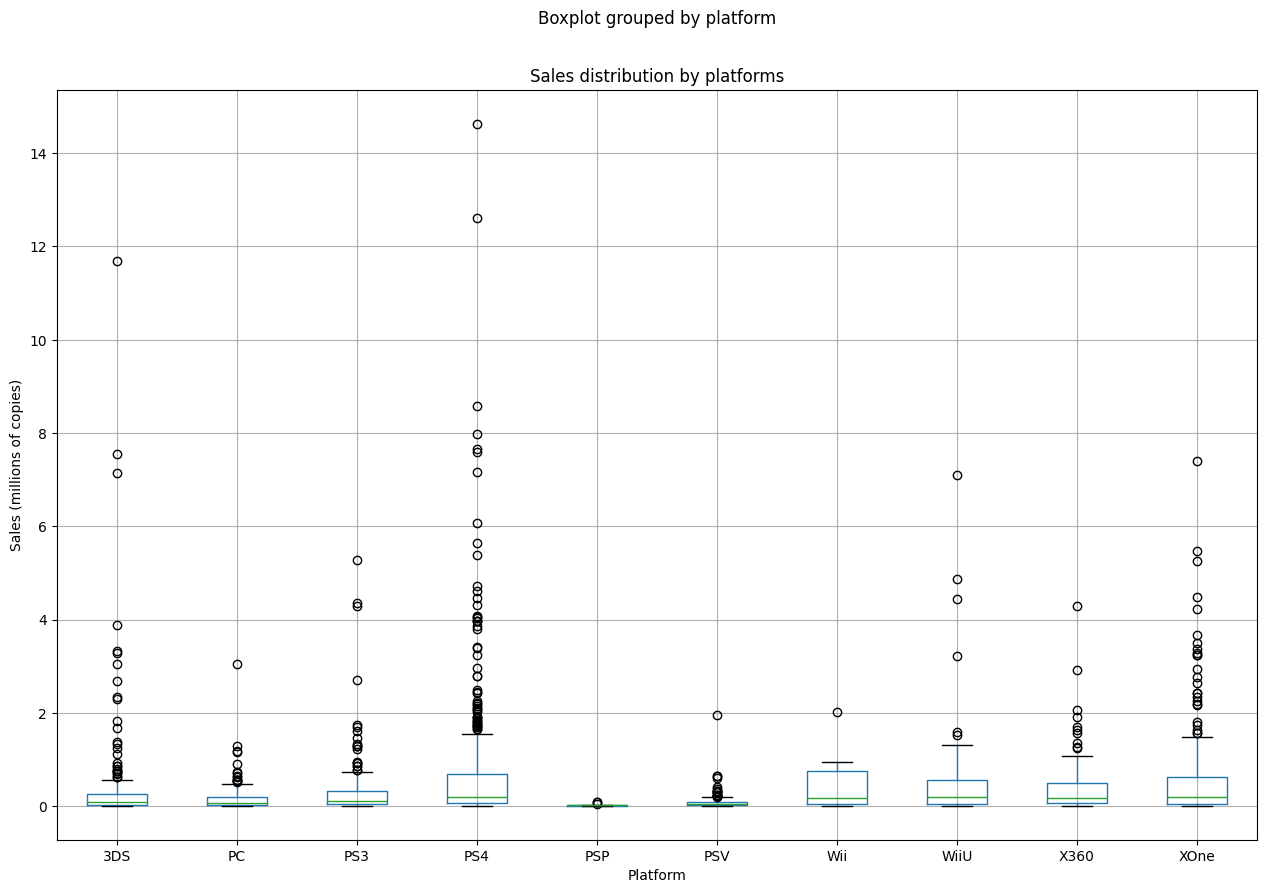

In [21]:
data.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.title('Sales distribution by platforms')
plt.xlabel('Platform')
plt.ylabel('Sales (millions of copies)')
plt.show()

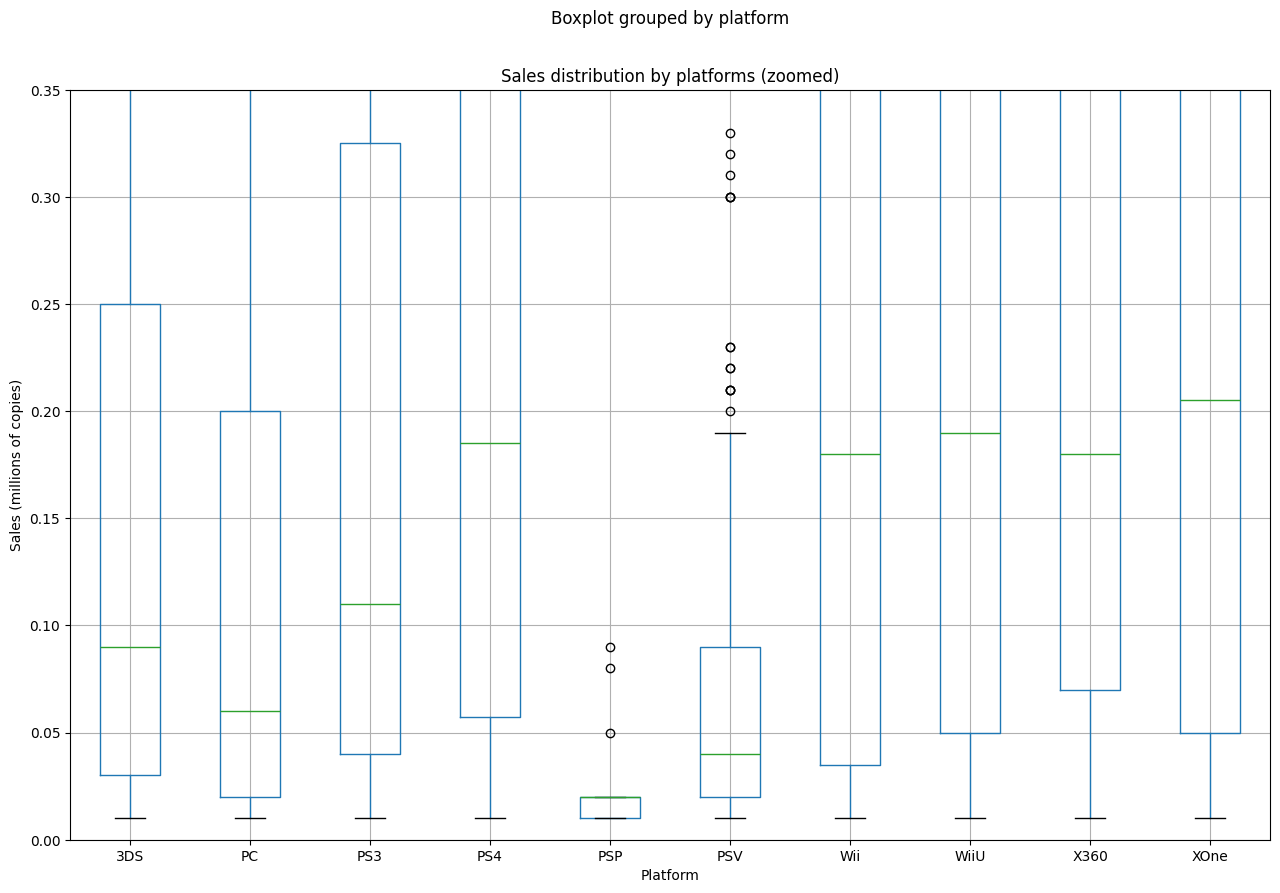

In [22]:
data.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.title('Sales distribution by platforms (zoomed)')
plt.ylim(0, np.percentile(data['total_sales'], 75))
plt.xlabel('Platform')
plt.ylabel('Sales (millions of copies)')
plt.show()

It can be noticed that among the current platforms, the highest number of outliers is observed for 3DS, PS4, and Xbox One. This may indicate a significant success of these platforms. In addition to the mentioned platforms, outliers are also observed for Xbox 360 and PS3; however, these platforms are outdated and not promising. The largest variation in sales is observed for PS4, Wii, and Xbox One.

platform
XOne    0.205
WiiU    0.190
PS4     0.185
Wii     0.180
X360    0.180
Name: total_sales, dtype: float64


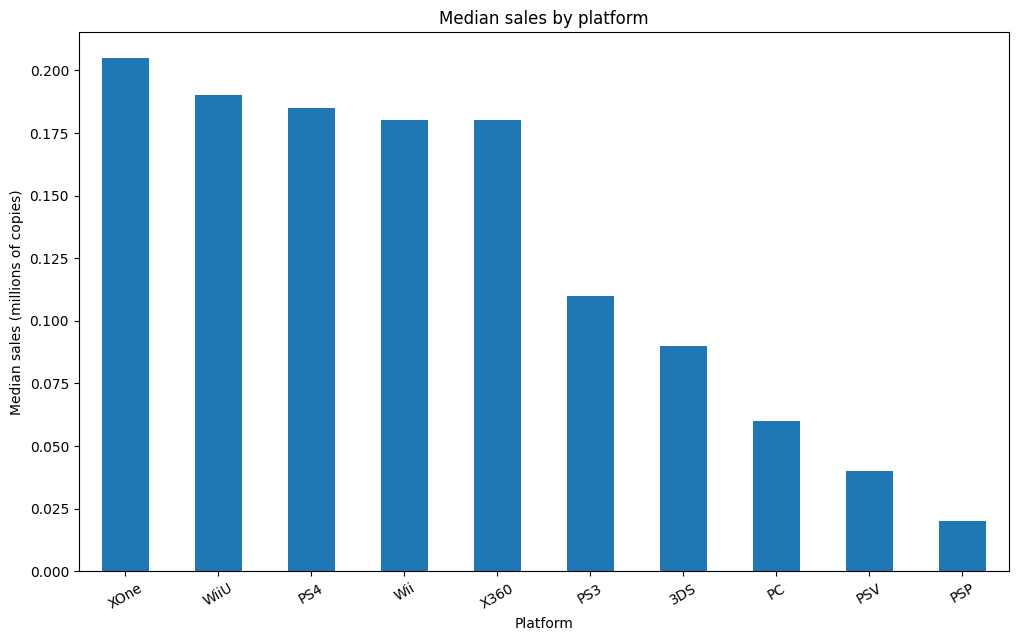

In [23]:

median_sales_by_platform = data.groupby('platform')['total_sales'].median().sort_values(ascending=False)
print(median_sales_by_platform.head(5))
median_sales_by_platform.plot(kind='bar', figsize=(12,7))
plt.title('Median sales by platform')
plt.ylabel('Median sales (millions of copies)')
plt.xlabel('Platform')
plt.xticks(rotation=30)
plt.show()

Based on median sales, Xbox One leads with 205 thousand copies sold, followed by Wii U and PS4 with 190 and 185 thousand copies sold respectively.

Based on the analysis of platform relevance, it can be concluded that the systems with the greatest growth potential are PS4 and Xbox One. These platforms lead in sales and have the highest number of outliers (indicating platform success). Although 3DS and Wii U have some sales, their popularity has been declining in recent years. Platforms like Xbox 360 and PS3, which were popular in the past, have now reached the end of their lifecycle.

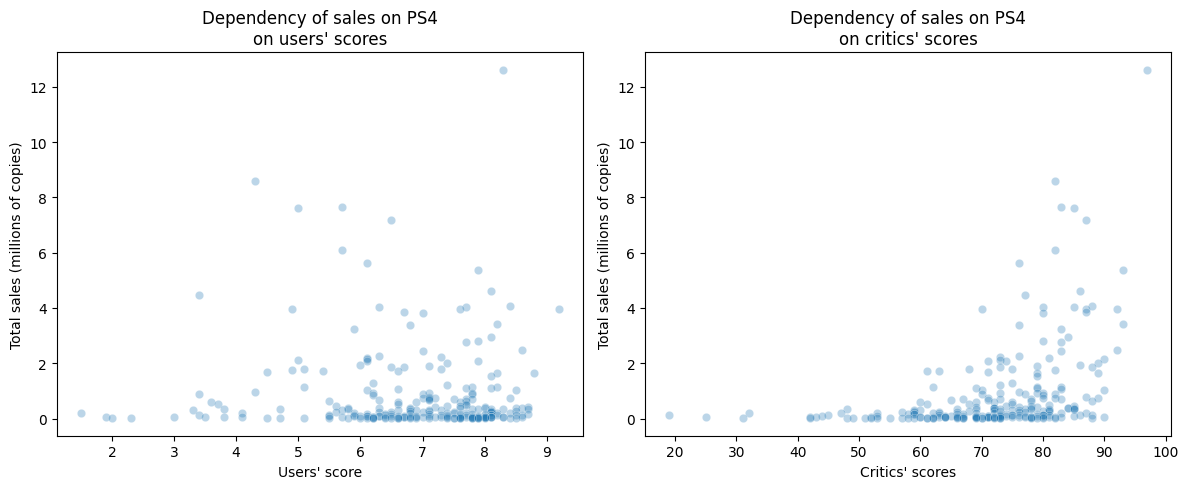

Correlaltion between sales on PS4 and user scores: -0.04
Correlation between sales on PS4 and critic scores: 0.403


In [24]:
def sales_by_scores(df, plat):
    df_user = df.query('platform == @plat & user_score != 0')
    df_critic = df.query('platform == @plat & critic_score != 0')
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df_user, x='user_score', y='total_sales', alpha=0.3)
    plt.title(f"Dependency of sales on {plat}\non users' scores")
    plt.xlabel("Users' score")
    plt.ylabel('Total sales (millions of copies)')
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df_critic, x='critic_score', y='total_sales', alpha=0.3)
    plt.title(f"Dependency of sales on {plat}\non critics' scores")
    plt.xlabel("Critics' scores")
    plt.ylabel('Total sales (millions of copies)')
    plt.tight_layout()
    plt.show()
    print(f"Correlaltion between sales on {plat} and user scores: {round(df_user['total_sales'].corr(df_user['user_score']), 3)}")
    print(f"Correlation between sales on {plat} and critic scores: {round(df_critic['total_sales'].corr(df_critic['critic_score']), 3)}")


sales_by_scores(data, 'PS4')

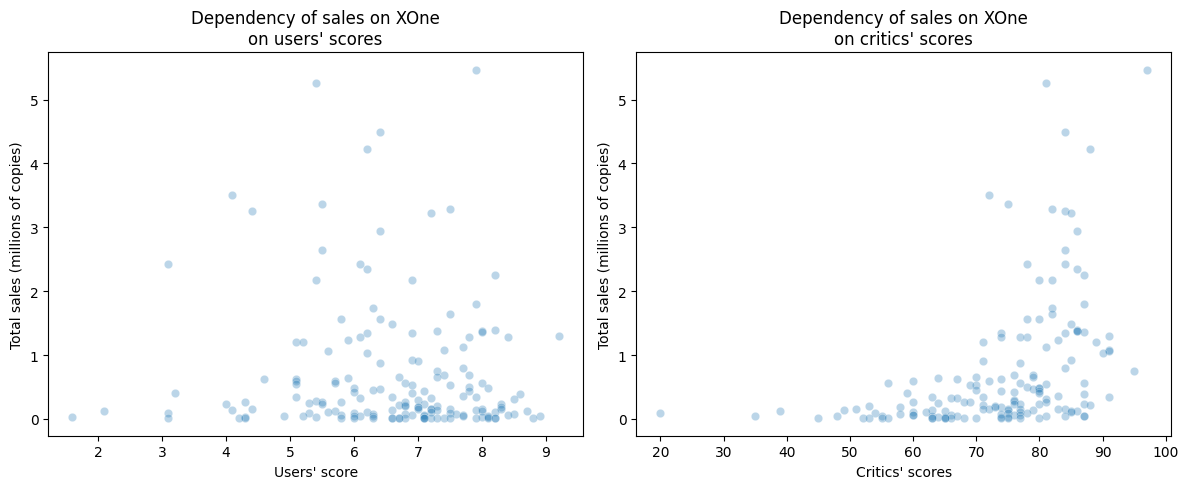

Correlaltion between sales on XOne and user scores: -0.07
Correlation between sales on XOne and critic scores: 0.429


In [25]:
sales_by_scores(data, "XOne")

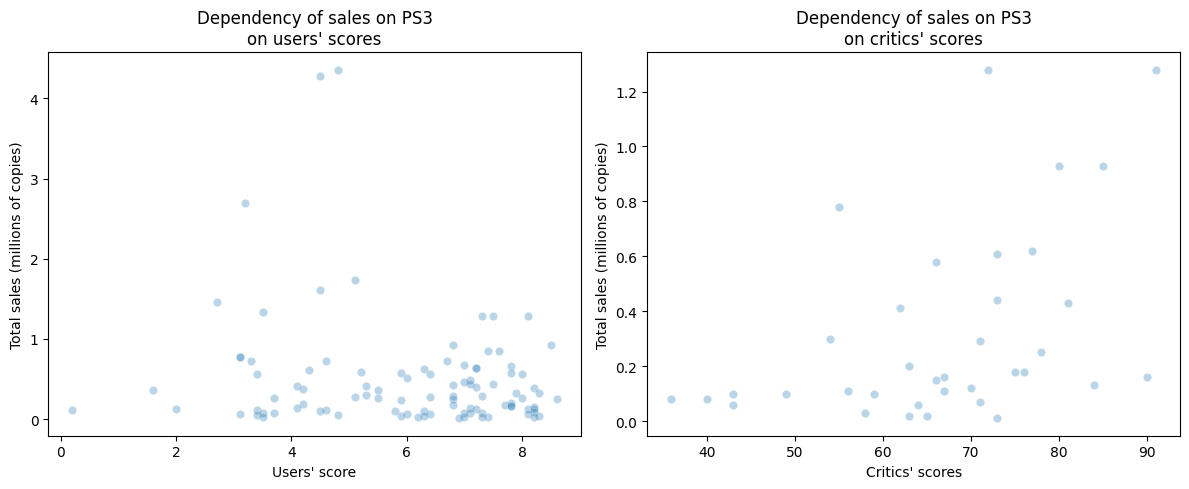

Correlaltion between sales on PS3 and user scores: -0.167
Correlation between sales on PS3 and critic scores: 0.447


In [26]:
sales_by_scores(data, "PS3")

It can be concluded that sales do not correlate with user reviews and critic reviews; however, the correlation coefficient with critic reviews is higher.

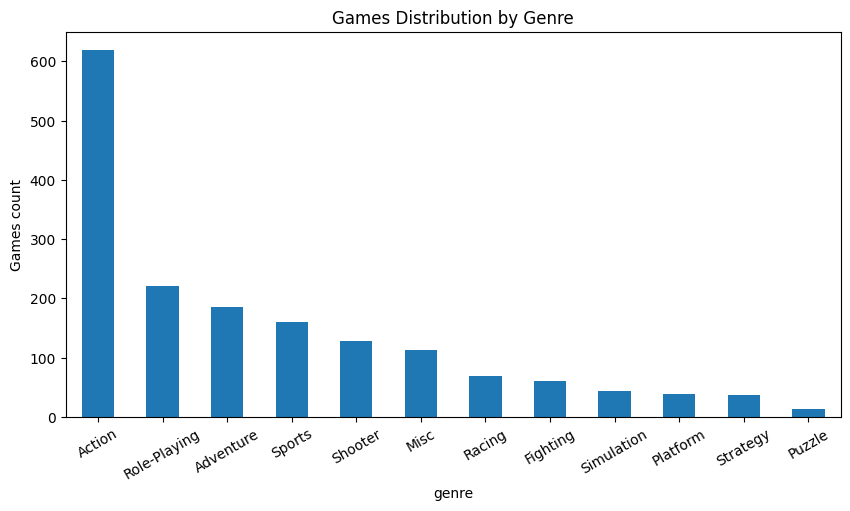

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: count, dtype: int64

In [27]:
data.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30)
plt.title('Games Distribution by Genre')
plt.ylabel('Games count')
plt.show()
data['genre'].value_counts()

Games in the Action genre significantly outnumber those in any other genre, with a total of 619 titles. Games in the Sports, Role-Playing, and Adventure genres range from around 160 to 220 projects, followed by the Shooter genre with 128 games.

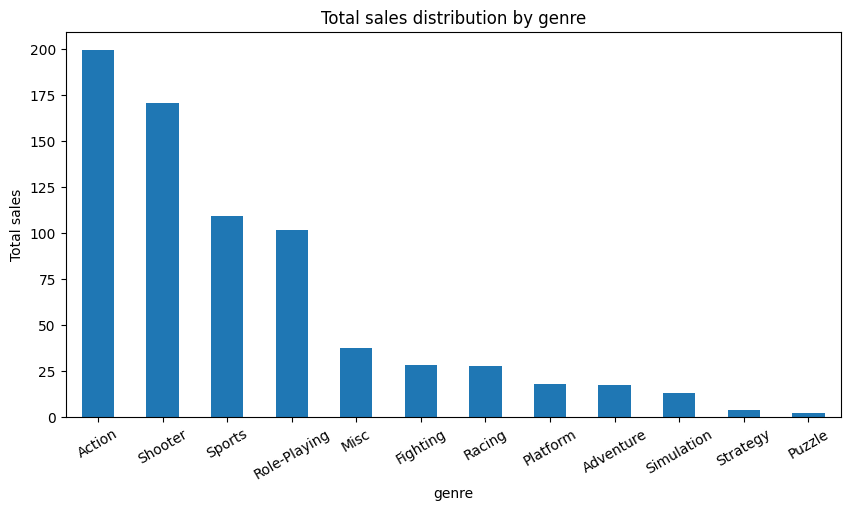

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

In [28]:
data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Total sales distribution by genre')
plt.xticks(rotation=30)
plt.ylabel('Total sales')
plt.show()
data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

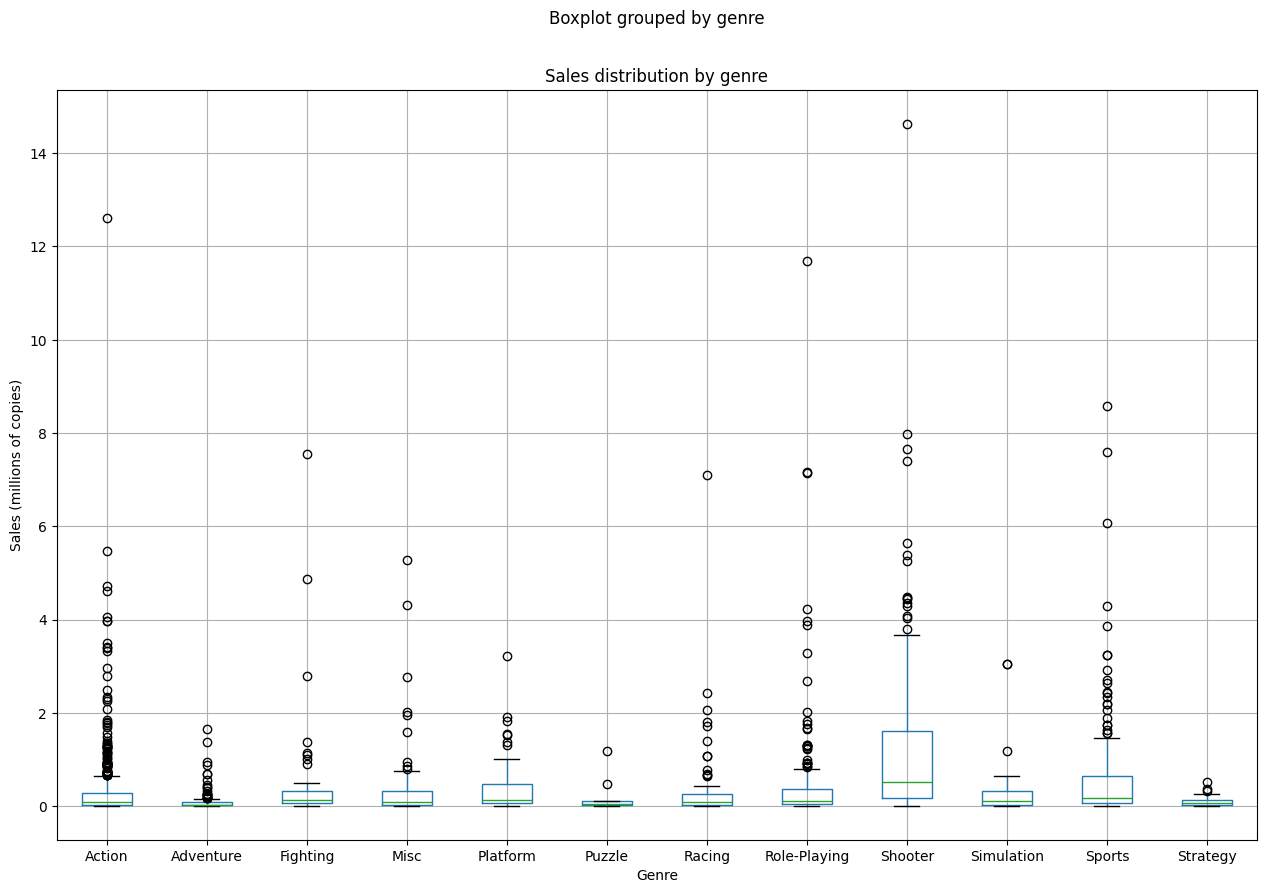

In [29]:
data.boxplot(column='total_sales', by='genre', figsize=(15, 10))
plt.title('Sales distribution by genre')
plt.xlabel('Genre')
plt.ylabel('Sales (millions of copies)')
plt.show()

Among the genres, Action, Role-Playing, Shooter, and Sports have the most outliers in terms of sales. This indicates a plethora of successful games within these genres, with sales significantly higher than average.

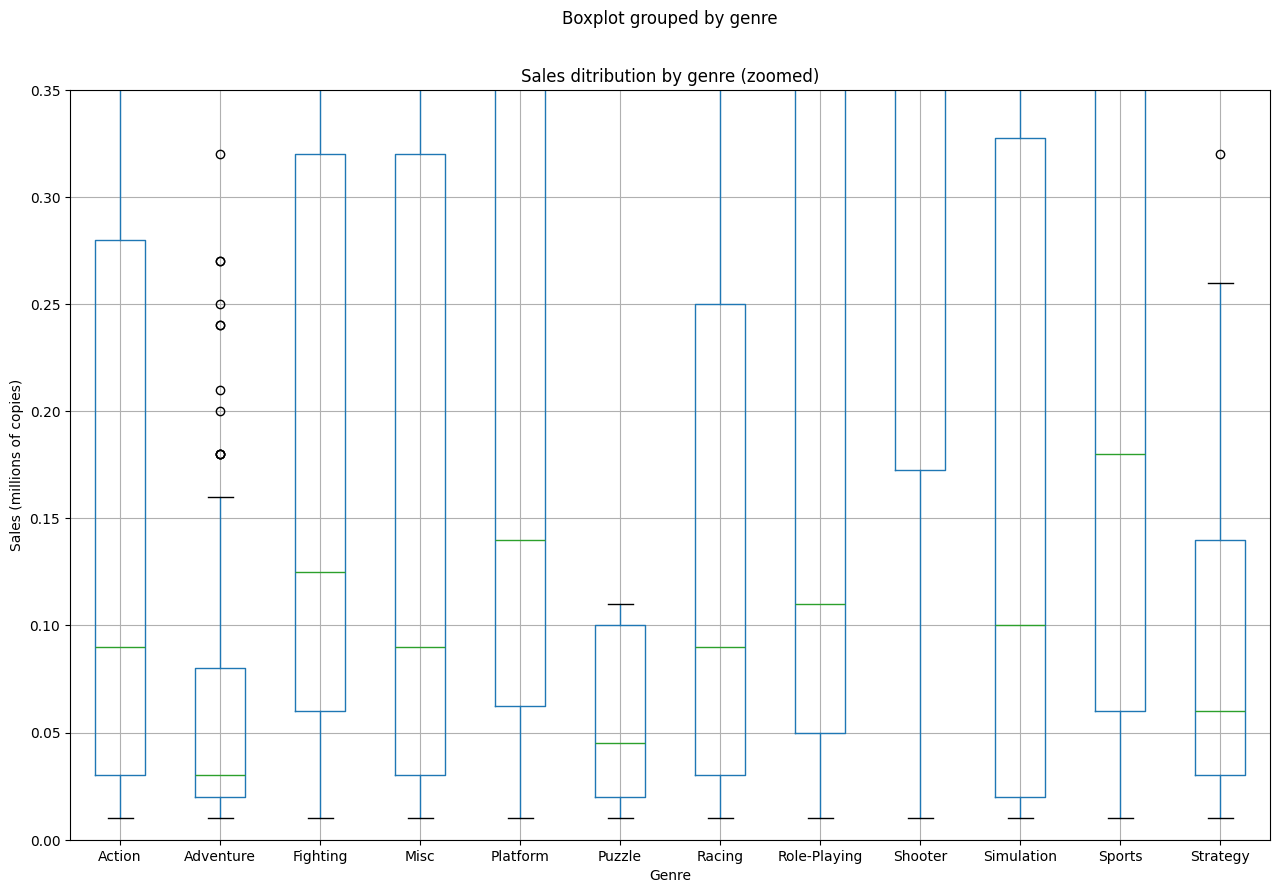

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Name: total_sales, dtype: float64

In [30]:
data.boxplot(column='total_sales', by='genre', figsize=(15, 10))
plt.ylim(0, np.percentile(data['total_sales'], 75))
plt.title('Sales ditribution by genre (zoomed)')
plt.xlabel('Genre')
plt.ylabel('Sales (millions of copies)')
plt.show()
data.groupby('genre')['total_sales'].median().sort_values(ascending=False).head(5)

Highest median sales are observed in the Shooter (515k copies), Sports (180k), and Platform (140k) genres. These genres also lead in terms of sales variability.

The most selling genres are Action, Shooter, Sports, and Role-Playing.

There is a group of genres with low sales:
- Racing
- Platform
- Fighting
- Simulation
- Adventure
- Puzzle

**Summary of Analysis:**

1) The peak years in the gaming industry were 2008 and 2009, with the highest number of game releases - 1426 and 1427 respectively.
2) The most selling platforms of all time are PS2 (1255 million copies), Xbox 360 (971 million copies), PS3 (939 million copies).
3) The most popular platforms had a lifespan of no more than 10-11 years.
4) It was found that the median lifespan of a platform is 6 years. Data from 2013 onwards were used in the analysis to ensure relevance of conclusions.
5) Among the current platforms, PS3 and Xbox 360 lead in sales, but their sales have been declining in recent years. On the other hand, sales of platforms like PS4 and Xbox One are growing (over 100 million and 50 million copies sold respectively as of 2015) - they can be considered the most potential ones.
6) Platforms like PS4 have the highest number of outliers in sales, indicating the presence of highly successful projects and exclusives whose sales significantly exceed other games.
7) Critic and user reviews do not affect game sales; the correlation coefficients between these variables and sales are too small.
8) The Action genre is the most popular among others, with sales of almost 200 million copies and a count of 619 games, which is almost three times more than the next most popular genre.
9) Total sales for genres like Racing, Platform, Fighting, Simulation, Adventure, Strategy, and Puzzle are extremely low compared to the other half of genres - Action, Shooter, Sports, Role-Playing, Misc.

## Step 4. User Portrait

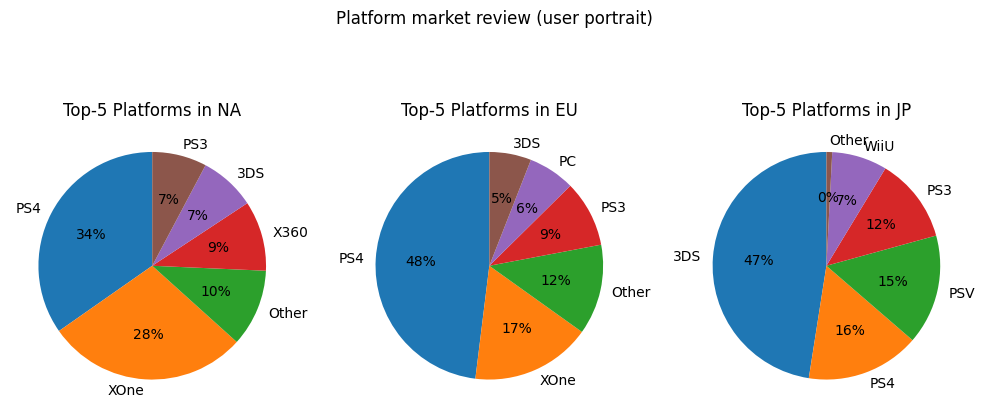

In [31]:
na_platforms = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_platforms['Other'] = na_platforms.iloc[5:].sum()
na_platforms = na_platforms.sort_values(ascending=False).head(6)
eu_platforms = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_platforms['Other'] = eu_platforms.iloc[5:].sum()
eu_platforms = eu_platforms.sort_values(ascending=False).head(6)
jp_platforms = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_platforms['Other'] = jp_platforms.iloc[5:].sum()
jp_platforms = jp_platforms.sort_values(ascending=False).head(6)
plt.figure(figsize=(10, 5))
plt.suptitle("Platform market review (user portrait)")
plt.subplot(1, 3, 1)
plt.title('Top-5 Platforms in NA')
plt.pie(na_platforms, labels=na_platforms.index.tolist(), startangle=90, autopct='%d%%')
plt.subplot(1, 3, 2)
plt.title('Top-5 Platforms in EU')
plt.pie(eu_platforms, labels=eu_platforms.index.tolist(), startangle=90, autopct='%d%%')
plt.subplot(1, 3, 3)
plt.title('Top-5 Platforms in JP')
plt.pie(jp_platforms, labels=jp_platforms.index.tolist(), startangle=90, autopct='%d%%')
plt.tight_layout()
plt.show()

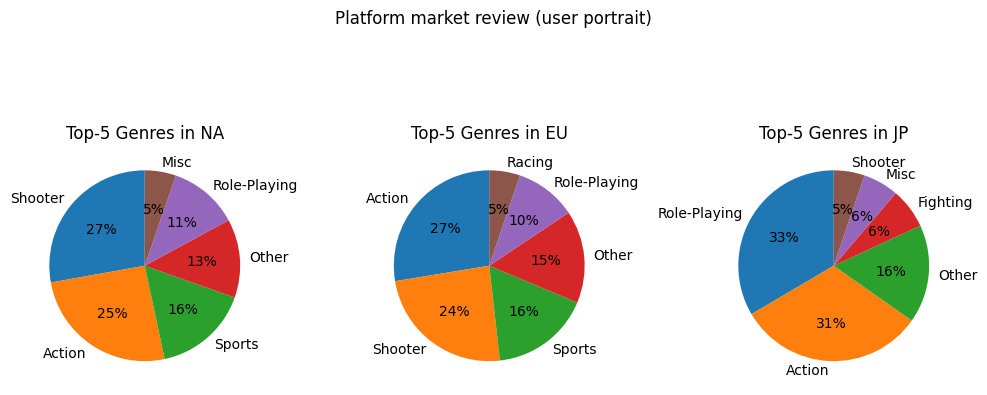

In [32]:
na_genres = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_genres['Other'] = na_genres.iloc[5:].sum()
na_genres = na_genres.sort_values(ascending=False).head(6)
eu_genres = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_genres['Other'] = eu_genres.iloc[5:].sum()
eu_genres = eu_genres.sort_values(ascending=False).head(6)
jp_genres = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_genres['Other'] = jp_genres.iloc[5:].sum()
jp_genres = jp_genres.sort_values(ascending=False).head(6)
plt.figure(figsize=(10, 5))
plt.suptitle("Platform market review (user portrait)")
plt.subplot(1, 3, 1)
plt.title('Top-5 Genres in NA')
plt.pie(na_genres, labels=na_genres.index.tolist(), startangle=90, autopct='%d%%')
plt.subplot(1, 3, 2)
plt.title('Top-5 Genres in EU')
plt.pie(eu_genres, labels=eu_genres.index.tolist(), startangle=90, autopct='%d%%')
plt.subplot(1, 3, 3)
plt.title('Top-5 Genres in JP')
plt.pie(jp_genres, labels=jp_genres.index.tolist(), startangle=90, autopct='%d%%')
plt.tight_layout()
plt.show()

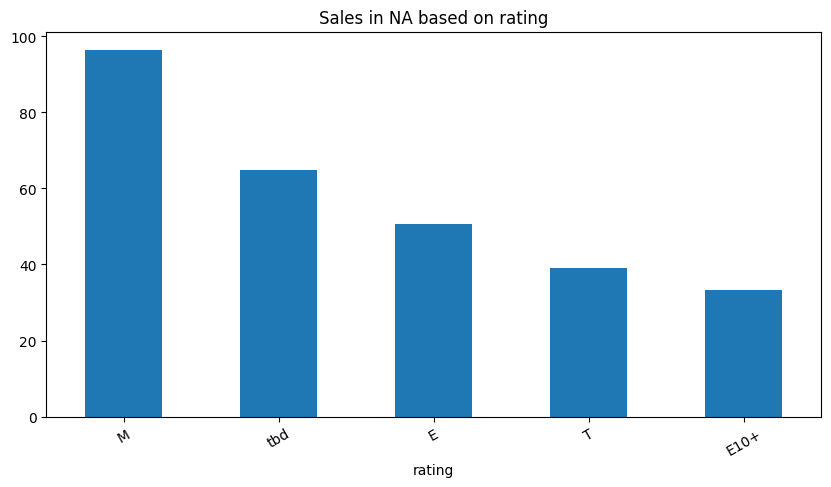

In [33]:
data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30)
plt.title('Sales in NA based on rating')
plt.show()

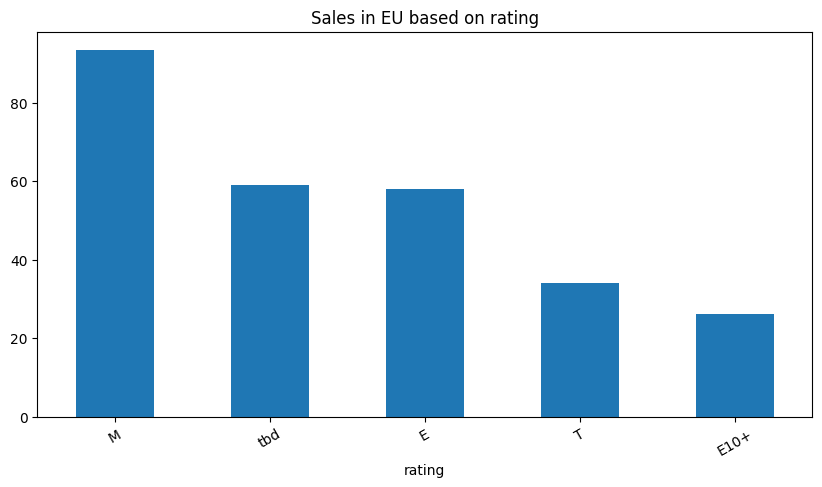

In [34]:
data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30)
plt.title('Sales in EU based on rating')
plt.show()

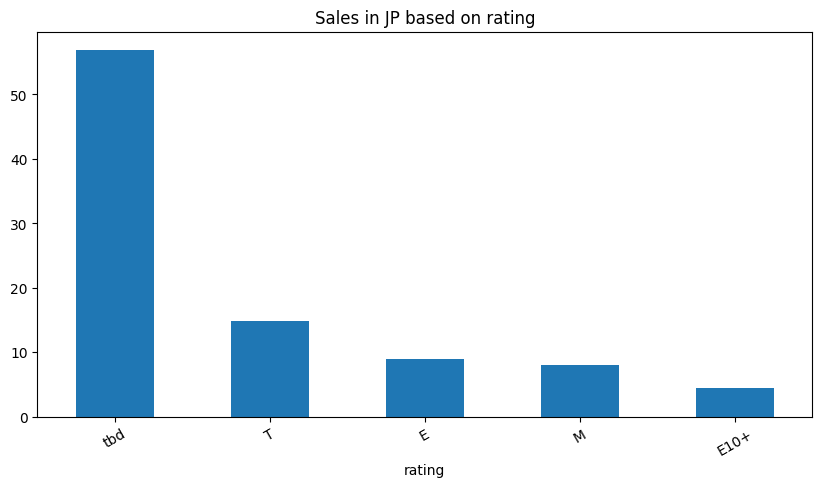

In [35]:
data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30)
plt.title('Sales in JP based on rating')
plt.show()

North America

- In the NA region, the PS4 platform dominates, with sales accounting for 34%, compared to the Xbox One, which accounted for 28%. Other platforms lag far behind in sales.
- The most popular genres are Action and Shooter (25% and 27% of sales respectively). Less popular genres include Sports, Misc, and Role-Playing.
- Among the ratings, the best-selling is M, with over 90 million copies sold. It is followed by ratings tbd (approximately 60 million), E (approximately 50 million copies), T, E10+ (less than 40 million copies each).

Europe

- In Europe, the most popular platform is PS4, with sales accounting for 48% of the total. It is followed by Xbox One (17%) and others.
- Regarding genres in the European region, Action leads (27% of total sales), followed by Shooter (24%) and Sports (16%). Genres with fewer sales include Role-Playing and Racing.
- In terms of ratings, the distribution in Europe is similar to North America. The top ratings in Europe are also M, E, tbd, T, and E10+.

Japan

- In Japan, popular platforms differ significantly from Europe and America. Here, the highest sales belong to 3DS (47%) and PS4 (16%).
- Popular genres in Japan also differ from other regions. The most popular genre is Role-Playing (33% of sales), followed by Action (31% of sales).
- Popular ratings in Japan are the same as in America and Europe, but the distribution of sales is different. Over 50 million copies were sold under the tbd rating. Ratings T, E, M, and E10+ are in the range of 5-15 million copies. It is possible that ratings in Japan are based on a system different from ESRB, which is why the tbd rating is popular.

## Step 5. Testing the Hypotheses

### **Hypothesis 1:**<br>
Null Hypothesis: The average user ratings of Xbox One platform games are equal to the average user ratings of PC platform games.

Alternative Hypothesis: The average user rating of Xbox One platform games is not equal to the average user rating of PC platform games.

In [36]:
xone_ratings = data.loc[data['platform'] == 'XOne', 'user_score']
xone_ratings = xone_ratings[xone_ratings != 0]
pc_ratings = data0.loc[data0['platform'] == 'PC', 'user_score']
pc_ratings = pc_ratings[pc_ratings != 0]
alpha = 0.05
print(f'Statistical significance: {alpha}')
results = st.ttest_ind(xone_ratings,
                        pc_ratings, equal_var=False, alternative='two-sided')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print("Null hypothesis is rejected in the alternative's favor.")
else:
    print('Null hypothesis is not rejected.')

Statistical significance: 0.05
p-value: 0.0001296456736429045
Null hypothesis is rejected in the alternative's favor.


The null hypothesis of equality of average user ratings on Xbox One and PC platforms is rejected. It can be concluded that these values differ.

### **Hypothesis 2:**<br>
Null Hypothesis: The average user rating of Action genre games is equal to the average user rating of Sports genre games.

Alternative Hypothesis: The average user rating of Action genre games differs from that of Sports genre games.

In [37]:
action_rating = data.loc[data['genre'] == 'Action', 'user_score']
action_rating = action_rating[action_rating != 0]
sports_rating = data.loc[data['genre'] == 'Sports', 'user_score']
sports_rating = sports_rating[sports_rating != 0]
alpha = 0.05
print(f'Statistical significance: {alpha}')
results = st.ttest_ind(action_rating,
                        sports_rating, equal_var=False, alternative='two-sided')
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print("Null hypothesis is rejected in the alternative's favor.")
else:
    print('Null hypothesis is not rejected')

Statistical significance: 0.05
p-value: 1.1825550382644557e-14
Null hypothesis is rejected in the alternative's favor.


In [38]:
data.loc[data['genre'] == 'Action', 'user_score']

1       8.3
14      7.9
19      0.0
20      8.1
30      6.3
       ... 
1679    0.0
1681    0.0
1682    7.6
1683    0.0
1686    0.0
Name: user_score, Length: 619, dtype: float64

The null hypothesis of equality between the two values is rejected. It can be concluded that the average user ratings of the "Action" and "Sports" genres are different.

## Overall Conclusion

The work involved data preprocessing and analysis of the "Streamchik" video game store dataset. The data was preprocessed and cleaned of missing values, preparing it for analysis. The analysis revealed patterns and identified potential directions:

*Platform Lifecycle*

1) The most selling platforms of all time are PS2 (1255 million copies), Xbox 360 (971 million copies), PS3 (939 million copies). The most successful platform was PS2, which had a lifespan of 11 years. The median lifespan of a platform is 6 years. Considering these factors, data for the last 3 years was analyzed to ensure data relevance for making forecasts for the next year.

*Current Platforms*

2) Sales of platforms like PS4 and Xbox One are growing (over 100 million and 50 million units sold respectively as of 2015) - these can be considered the most potential platforms.
3) Platforms like PS4 have the highest number of sales outliers, indicating the presence of highly successful projects and exclusives whose sales significantly exceed other games.

*Impact of Various Factors on Sales*

4) Critic and user reviews do not affect game sales; the correlation coefficients between these values are too small.
5) The Action genre is the most popular among others, with sales of nearly 200 million copies, and the number of games is almost three times higher than the next most popular genre.
6) Total sales of genres such as Racing, Platform, Fighting, Simulation, Adventure, Strategy, and Puzzle are extremely low compared to the other half of genres - Action, Shooter, Sports, Role-Playing, and Misc.

*User Profiles for 3 Regions: North America, Europe, Japan*

7) In the NA region, the PS4 platform dominates with sales accounting for 34%, followed by Xbox One at 28%. The most popular genres are Action and Shooter (25% and 27% of sales respectively). Less popular genres are Sports, Misc, and Role-Playing. Among ratings, the most selling is M, followed by tbd, E, T, and E10+.
8) In Europe, the most popular platform is PS4, accounting for 48% of total sales, followed by Xbox One (17%) and others. The most popular genre is Action (27% of total sales), followed by Shooter and Sports. Ratings distribution is similar to North America.
9) In Japan, the popular platforms are significantly different from Europe and America. The 3DS (47%) and PS4 (16%) have the highest sales. The popular genres in Japan also differ, with Role-Playing and Action leading. Ratings popularity is similar to North America and Europe, but sales distribution is different.

*Hypothesis Testing*

10) The hypothesis of equality of average user ratings on Xbox One and PC platforms was tested. The null and alternative hypotheses were as follows:

- *Null Hypothesis - The average user ratings of Xbox One games are equal to the average user ratings of PC games.*
- *Alternative Hypothesis - The average user rating of Xbox One games is different from that of PC games.*

The result - the null hypothesis is rejected, indicating that the average user ratings on Xbox One and PC platforms are different.

11) The hypothesis of the difference in average user ratings of Action and Sports genres was also tested:

- *Null Hypothesis - The average user rating of Action genre games is equal to the average user rating of Sports genre games.*
- *Alternative Hypothesis - The average user rating of Action genre games is different from that of Sports genre games.*

The result - the null hypothesis is rejected, suggesting that the average user ratings in the Action and Sports genres differ.

In conclusion, the most promising directions in the gaming industry were identified, platforms, genres, and ratings were analyzed over different time periods. The project helped identify growing platforms in the modern gaming industry - Xbox One and PS4. The most popular types of games in the NA, EU, and JP regions were determined. Hypotheses about user ratings of different genres and platforms were formulated and tested. However, the analysis did not cover the pricing aspect of games, which would allow calculating revenue from different projects. Therefore, the pricing theme is recommended for further analysis.